<a href="https://colab.research.google.com/github/Sulthonikamalm/TUGASRUMAHPRAKTIKUM/blob/main/TUGASBESAR%20%22Analisis%20Regresi%20Linier%20Tentang%20Pengaruh%20Score%20Membaca%20Anak%20Terhadap%20Score%20Kemahiran%20Menulis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# TUGAS BESAR STATISTIKA PROBABILITAS

In [2]:
!pip install pandas seaborn statsmodels



Analisis berikut ini dilakukan pada struktur data yang dihasilkan dari nilai tes siswa hipotetis dan berbagai karakteristik siswa.

Analisis ini mencakup analisis data eksplorasi, pemodelan regresi, dan pemeriksaan asumsi

1. **Impor Pustaka**

In [3]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, levene

2. **Membaca Datasets**



In [5]:
# Membaca dataset
data = pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


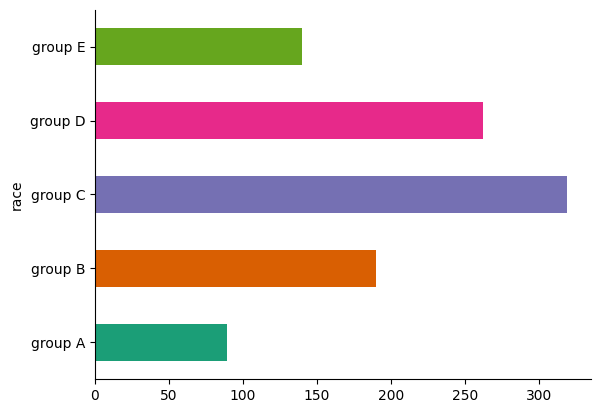

In [28]:
# @title race

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

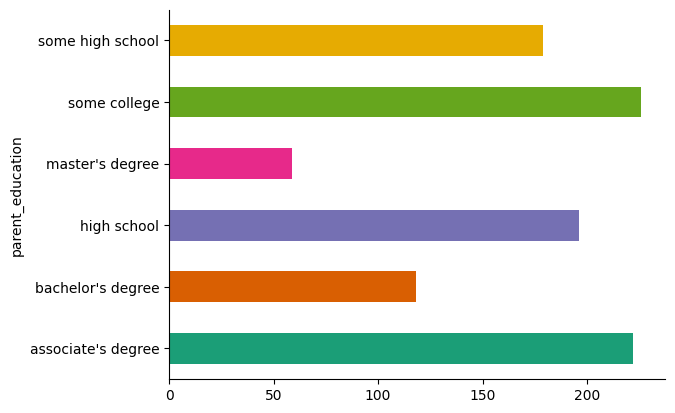

In [27]:
# @title parent_education

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('parent_education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

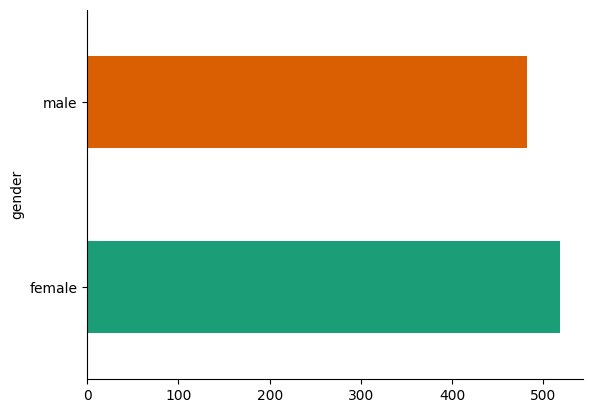

In [26]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**PENJELASAN**


1. **gender**: Jenis kelamin siswa, yang dapat berupa 'male' (laki-laki) atau 'female' (perempuan).
2. **race/ethnicity**: Kelompok ras atau etnis siswa, diberi label sebagai 'group A', 'group B', 'group C', 'group D', atau 'group E'.
3. **parental level of education**: Tingkat pendidikan orang tua siswa, yang dapat berupa 'high school' (sekolah menengah), 'some high school' (beberapa sekolah menengah), 'associate's degree' (gelar associate), 'bachelor's degree' (gelar sarjana), 'master's degree' (gelar master), atau 'some college' (beberapa perguruan tinggi).
4. **lunch**: Jenis makan siang yang diterima siswa, yang dapat berupa 'standard' (standar) atau 'free/reduced' (gratis/terdiskon).
5. **test preparation course**: Status siswa dalam mengikuti kursus persiapan ujian, yang dapat berupa 'none' (tidak mengikuti) atau 'completed' (telah menyelesaikan).
6. **math score**: Nilai siswa dalam mata pelajaran matematika.
7. **reading score**: Nilai siswa dalam mata pelajaran membaca.
8. **writing score**: Nilai siswa dalam mata pelajaran menulis.

Output yang dihasilkan adalah tampilan dari beberapa baris pertama dan beberapa baris terakhir dari dataframe, yang memberikan gambaran tentang bagaimana data disusun
Penjelasan dari beberapa baris pertama dan terakhir:

- Baris pertama menunjukkan seorang siswa perempuan dari kelompok etnis B, dengan orang tua yang memiliki gelar sarjana, menerima makan siang standar, tidak mengikuti kursus persiapan ujian, dengan nilai matematika 72, nilai membaca 72, dan nilai menulis 74.
- Baris kedua menunjukkan seorang siswa perempuan dari kelompok etnis C, dengan orang tua yang pernah kuliah, menerima makan siang standar, telah menyelesaikan kursus persiapan ujian, dengan nilai matematika 69, nilai membaca 90, dan nilai menulis 88.
- Baris ketiga menunjukkan seorang siswa perempuan dari kelompok etnis B, dengan orang tua yang memiliki gelar master, menerima makan siang standar, tidak mengikuti kursus persiapan ujian, dengan nilai matematika 90, nilai membaca 95, dan nilai menulis 93.
- Baris terakhir menunjukkan seorang siswa perempuan dari kelompok etnis D, dengan orang tua yang pernah kuliah, menerima makan siang gratis/terdiskon, tidak mengikuti kursus persiapan ujian, dengan nilai matematika 77, nilai membaca 86, dan nilai menulis 86.

Jumlah total baris adalah 1000 dan terdapat 8 kolom dalam dataset ini.


3. **GAMBARAN UMUM DATA**

In [6]:
data.shape


(1000, 8)

In [7]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**PENJELASAN**

1. **`<class 'pandas.core.frame.DataFrame'>`**:
   - Ini menunjukkan bahwa objek yang ditampilkan adalah sebuah dataframe dari pustaka pandas.

2. **`RangeIndex: 1000 entries, 0 to 999`**:
   - Dataframe ini memiliki 1000 entri atau baris, dengan indeks yang dimulai dari 0 hingga 999.

3. **`Data columns (total 8 columns):`**:
   - Dataframe ini terdiri dari 8 kolom.

4. **Daftar kolom beserta informasinya**:
   - Setiap kolom dalam dataframe ditampilkan beserta jumlah nilai yang tidak null dan tipe datanya.
   
   Berikut adalah rincian untuk setiap kolom:
   
   - **`0 gender`**:
     - Nama kolom: `gender`
     - Jumlah nilai tidak null: 1000
     - Tipe data: `object` (tipe data ini digunakan untuk teks atau string)
   
   - **`1 race/ethnicity`**:
     - Nama kolom: `race/ethnicity`
     - Jumlah nilai tidak null: 1000
     - Tipe data: `object`
   
   - **`2 parental level of education`**:
     - Nama kolom: `parental level of education`
     - Jumlah nilai tidak null: 1000
     - Tipe data: `object`
   
   - **`3 lunch`**:
     - Nama kolom: `lunch`
     - Jumlah nilai tidak null: 1000
     - Tipe data: `object`
   
   - **`4 test preparation course`**:
     - Nama kolom: `test preparation course`
     - Jumlah nilai tidak null: 1000
     - Tipe data: `object`
   
   - **`5 math score`**:
     - Nama kolom: `math score`
     - Jumlah nilai tidak null: 1000
     - Tipe data: `int64` (tipe data ini digunakan untuk angka bulat)
   
   - **`6 reading score`**:
     - Nama kolom: `reading score`
     - Jumlah nilai tidak null: 1000
     - Tipe data: `int64`
   
   - **`7 writing score`**:
     - Nama kolom: `writing score`
     - Jumlah nilai tidak null: 1000
     - Tipe data: `int64`
   
5. **`dtypes: int64(3), object(5)`**:
   - Ringkasan tipe data yang ada dalam dataframe: terdapat 3 kolom dengan tipe data `int64` dan 5 kolom dengan tipe data `object`.

6. **`memory usage: 62.6+ KB`**:
   - Memori yang digunakan oleh dataframe ini adalah sekitar 62.6 kilobyte.

Secara keseluruhan, output ini memberikan pandangan umum tentang struktur dataframe, termasuk jumlah baris dan kolom, tipe data dari setiap kolom, serta jumlah memori yang digunakan. Data ini sangat berguna untuk memahami data secara lebih mendalam sebelum melakukan analisis lebih lanjut.

4. **STATISTIK DESKRIPTIF**

In [9]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**PENJELASAN**

1. **`count`**:
   - Jumlah entri atau data yang ada dalam setiap kolom. Ini menunjukkan berapa banyak nilai yang tidak null atau kosong.

2. **`mean`**:
   - Rata-rata dari nilai-nilai dalam setiap kolom. Ini adalah jumlah dari semua nilai dibagi dengan jumlah entri.

3. **`std`**:
   - Standar deviasi, yang mengukur seberapa tersebar data dari nilai rata-ratanya. Standar deviasi yang lebih tinggi menunjukkan bahwa data lebih tersebar.

4. **`min`**:
   - Nilai minimum dalam setiap kolom. Ini adalah nilai terkecil yang ada dalam kolom tersebut.

5. **`25%` (Kuartil pertama)**:
   - Nilai di mana 25% dari data berada di bawah nilai ini. Ini juga dikenal sebagai persentil ke-25.

6. **`50%` (Median)**:
   - Nilai tengah dari data, di mana 50% dari data berada di bawah nilai ini. Ini juga dikenal sebagai persentil ke-50 atau median.

7. **`75%` (Kuartil ketiga)**:
   - Nilai di mana 75% dari data berada di bawah nilai ini. Ini juga dikenal sebagai persentil ke-75.

8. **`max`**:
   - Nilai maksimum dalam setiap kolom. Ini adalah nilai terbesar yang ada dalam kolom tersebut.


PENJELASAN DATA

1. **`count`**:
   - `math score`, `reading score`, dan `writing score` masing-masing memiliki 1000 entri yang tidak null.

2. **`mean`**:
   - Rata-rata nilai `math score` adalah 66.089.
   - Rata-rata nilai `reading score` adalah 69.169.
   - Rata-rata nilai `writing score` adalah 68.054.

3. **`std`**:
   - Standar deviasi `math score` adalah 15.16308, menunjukkan penyebaran nilai matematika sekitar rata-rata.
   - Standar deviasi `reading score` adalah 14.600192, menunjukkan penyebaran nilai membaca sekitar rata-rata.
   - Standar deviasi `writing score` adalah 15.195657, menunjukkan penyebaran nilai menulis sekitar rata-rata.

4. **`min`**:
   - Nilai minimum `math score` adalah 0.
   - Nilai minimum `reading score` adalah 17.
   - Nilai minimum `writing score` adalah 10.

5. **`25%`** (Kuartil pertama):
   - 25% dari siswa memiliki `math score` kurang dari atau sama dengan 57.
   - 25% dari siswa memiliki `reading score` kurang dari atau sama dengan 59.
   - 25% dari siswa memiliki `writing score` kurang dari atau sama dengan 57.75.

6. **`50%`** (Median):
   - Median `math score` adalah 66.
   - Median `reading score` adalah 70.
   - Median `writing score` adalah 69.

7. **`75%`** (Kuartil ketiga):
   - 75% dari siswa memiliki `math score` kurang dari atau sama dengan 77.
   - 75% dari siswa memiliki `reading score` kurang dari atau sama dengan 79.
   - 75% dari siswa memiliki `writing score` kurang dari atau sama dengan 79.

8. **`max`**:
   - Nilai maksimum `math score` adalah 100.
   - Nilai maksimum `reading score` adalah 100.
   - Nilai maksimum `writing score` adalah 100.

Ringkasan statistik ini membantu dalam memahami distribusi nilai dan variabilitas data dalam kolom-kolom numerik.

In [10]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


5. **PEMBERSIHAN DATA**

In [11]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


**Penjelasan**

Setiap kolom dalam dataframe tidak memiliki nilai kosong (null). Artinya, semua kolom `gender`, `race/ethnicity`, `parental level of education`, `lunch`, `test preparation course`, `math score`, `reading score`, dan `writing score` memiliki data lengkap untuk semua 1000 entri. Tidak ada data yang hilang dalam setiap kolom, yang ditunjukkan oleh jumlah nol pada setiap kolom.

Dengan demikian, dataset ini bersih dari nilai-nilai kosong, yang sangat penting untuk analisis data lebih lanjut karena kita tidak perlu menangani data yang hilang.

6. **MENGGANTI NAMA KOLOM**

In [12]:
data.rename(columns = {'race/ethnicity':'race'}, inplace = True)
data.rename(columns = {'parental level of education':'parent_education'}, inplace = True)
data.rename(columns = {'test preparation course':'prep_course'}, inplace = True)
data.rename(columns = {'math score':'math_score'}, inplace = True)
data.rename(columns = {'reading score':'reading_score'}, inplace = True)
data.rename(columns = {'writing score':'writing_score'}, inplace = True)

7. **VISUALISASI DISTRIBUSI DATA**

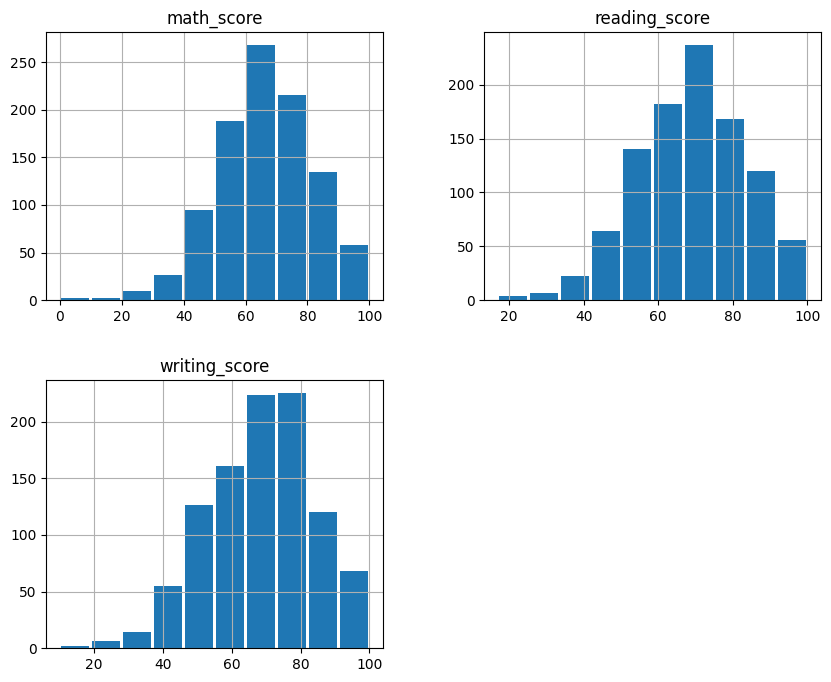

In [13]:
# Misalkan 'data' adalah DataFrame yang sudah ada
data.hist(figsize=(10, 8), rwidth=0.9)
plt.show()



**Penjelasan Kode**

- `data.hist()`: Membuat histogram untuk setiap kolom numerik dalam dataframe `data`.
- `figsize=(10, 8)`: Menentukan ukuran gambar histogram.
- `rwidth=0.9`: Menentukan lebar relatif dari setiap bar dalam histogram.
- `plt.show()`: Menampilkan plot yang telah dibuat.

**Penjelasan Gambar**

Gambar yang dihasilkan menunjukkan distribusi nilai untuk tiga kolom numerik: `math score`, `reading score`, dan `writing score`. Berikut adalah penjelasannya:

1. **math score**:
   - Distribusi nilai matematika terlihat seperti distribusi normal dengan sedikit skew ke kanan.
   - Mayoritas nilai berada di sekitar 60 hingga 80.
   - Ada beberapa siswa yang mendapatkan nilai sangat rendah (mendekati 0) dan sangat tinggi (mendekati 100).

2. **reading score**:
   - Distribusi nilai membaca juga mirip dengan distribusi normal.
   - Mayoritas nilai berada di sekitar 60 hingga 80.
   - Ada lebih sedikit nilai ekstrem dibandingkan dengan nilai matematika, tetapi tetap ada beberapa siswa yang mendapatkan nilai rendah dan tinggi.

3. **writing score**:
   - Distribusi nilai menulis menunjukkan pola yang mirip dengan nilai membaca dan matematika.
   - Mayoritas nilai berada di sekitar 60 hingga 80.
   - Distribusi ini juga sedikit skew ke kanan, dengan beberapa nilai sangat rendah dan tinggi.

**Kesimpulan**

Histogram ini memberikan gambaran visual tentang bagaimana nilai-nilai dalam ketiga mata pelajaran didistribusikan di antara siswa. Sebagian besar siswa mendapatkan nilai antara 60 dan 80, yang menunjukkan kinerja yang relatif serupa dalam ketiga mata pelajaran ini. Adanya beberapa nilai ekstrem menunjukkan adanya beberapa siswa yang berkinerja jauh lebih baik atau lebih buruk dibandingkan mayoritas siswa.

```
```

8. **MENGHAPUS OUTLIER**

    Kode dibawah berfungsi untuk menghapus outlier (data yang jauh dari rentang nilai normal) dari setiap variabel dan membuat boxplot untuk masing-masing variabel tanpa outlier. Boxplot adalah visualisasi yang berguna untuk melihat distribusi data dan mengidentifikasi adanya outlier.

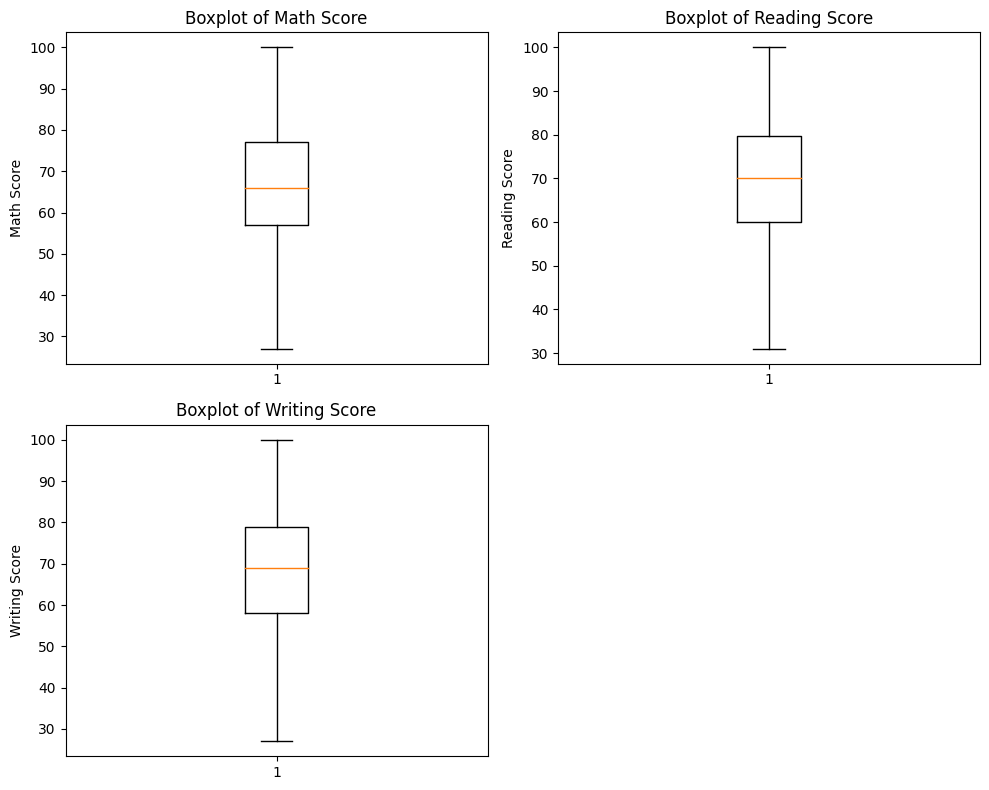

In [14]:
#  Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of variables to plot
variables = ['math_score', 'reading_score', 'writing_score']

# Create one figure for all boxplots
plt.figure(figsize=(10, 8))

# Create a boxplot for each variable without outliers
for i, var in enumerate(variables, start=1):
    data_no_outliers = remove_outliers(data, var)
    plt.subplot(2, 2, i)
    plt.boxplot(data_no_outliers[var], showfliers=False)
    plt.title(f'Boxplot of {var.replace("_", " ").title()}')
    plt.ylabel(var.replace("_", " ").title())

plt.tight_layout()
plt.show()



** Penjelasan Kode**

1. **remove_outliers(df, column)**:
   - Fungsi ini digunakan untuk menghapus outlier dari kolom tertentu dalam dataframe.
   - `Q1` dan `Q3` adalah kuartil pertama dan ketiga.
   - `IQR` (Interquartile Range) adalah jarak antara Q3 dan Q1.
   - `lower_bound` dan `upper_bound` digunakan untuk menentukan batas bawah dan batas atas untuk outlier.
   - Data yang berada di antara `lower_bound` dan `upper_bound` dikembalikan, yang berarti outlier di luar batas ini dihapus.

2. **variables**:
   - Daftar kolom yang akan dibuat boxplotnya.

3. **plt.figure(figsize=(10, 8))**:
   - Membuat sebuah figure dengan ukuran 10x8 inci.

4. **for loop**:
   - Loop ini membuat boxplot untuk setiap variabel dalam daftar `variables`.
   - `data_no_outliers` adalah dataframe yang telah dihapus outliernya untuk kolom yang sedang diproses.
   - `plt.subplot(2, 2, i)` membuat subplot pada figure.
   - `plt.boxplot(data_no_outliers[var], showfliers=False)` membuat boxplot tanpa menampilkan outlier.
   - `plt.title` dan `plt.ylabel` menambahkan judul dan label pada masing-masing plot.

5. **plt.tight_layout()**:
   - Menyesuaikan tata letak subplot agar tidak tumpang tindih.

6. **plt.show()**:
   - Menampilkan plot yang telah dibuat.

**Penjelasan Grafik**

Gambar yang dihasilkan menunjukkan boxplot untuk `math_score`, `reading_score`, dan `writing_score` tanpa outlier:

1. **Boxplot of Math Score**:
   - Menunjukkan distribusi nilai matematika tanpa outlier.
   - Kotak tengah menunjukkan interquartile range (IQR), garis di dalam kotak menunjukkan median.

2. **Boxplot of Reading Score**:
   - Menunjukkan distribusi nilai membaca tanpa outlier.
   - Kotak tengah menunjukkan IQR, garis di dalam kotak menunjukkan median.

3. **Boxplot of Writing Score**:
   - Menunjukkan distribusi nilai menulis tanpa outlier.
   - Kotak tengah menunjukkan IQR, garis di dalam kotak menunjukkan median.

**Kesimpulan**

Boxplot ini memberikan visualisasi yang jelas tentang distribusi nilai-nilai dalam ketiga mata pelajaran tanpa adanya gangguan dari outlier. Hal ini membantu dalam memahami sebaran data utama dan posisi median lebih baik.

```
```

9. **Visualisasi Hubungan Antar Variabel**

    Penjelasan ini menekankan pentingnya pairplot dalam analisis eksploratif data untuk mendeteksi hubungan dan pola yang mungkin tidak terlihat hanya dari statistik deskriptif. Ini membantu dalam mengidentifikasi tren, outlier, dan hubungan linear atau non-linear potensial antara variabel-variabel.

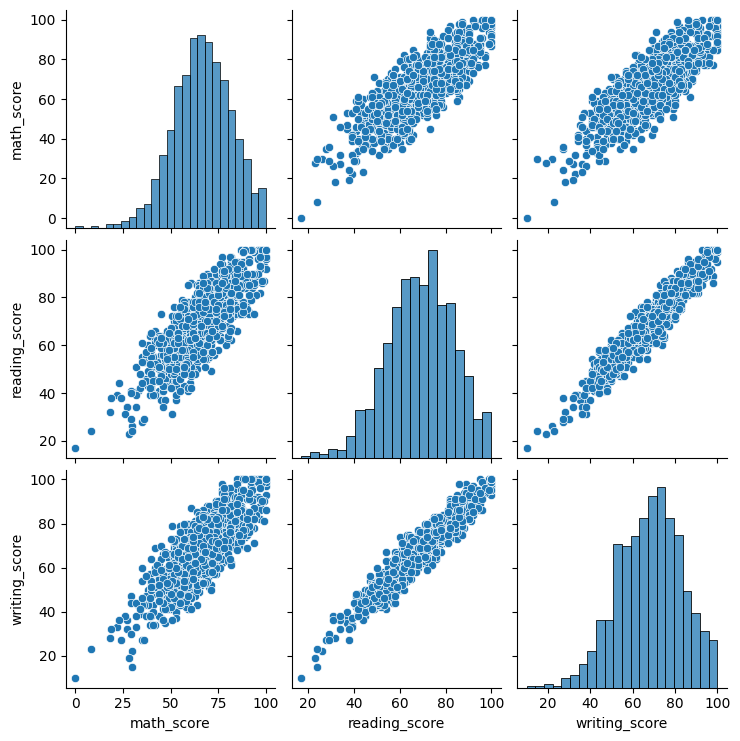

In [15]:

sns.pairplot(data)

**Penjelasan Kode**

Kode berikut digunakan untuk membuat visualisasi pasangan plot menggunakan seaborn:

```python
sns.pairplot(data)
```

Kode ini menghasilkan sepasang plot (pair plot) yang menampilkan hubungan antara semua pasangan kolom numerik dalam dataset.
**Penjelasan Grafik**

Grafik yang dihasilkan menunjukkan hubungan antara skor matematika, membaca, dan menulis. Berikut adalah penjelasan dari setiap bagian grafik:

**Plot Diagonal**
- **math_score**: Histogram ini menunjukkan distribusi skor matematika. Distribusi ini cenderung sedikit condong ke kiri, dengan sebagian besar skor berkumpul di sekitar 60-80.
- **reading_score**: Histogram ini menunjukkan distribusi skor membaca. Distribusi ini lebih simetris, dengan puncak sekitar 70-80.
- **writing_score**: Histogram ini juga menunjukkan distribusi yang simetris, dengan puncak di sekitar 70-80, mirip dengan skor membaca.

**Plot Off-Diagonal**
- **math_score vs. reading_score**: Scatter plot ini menunjukkan korelasi positif yang kuat, mengindikasikan bahwa siswa yang mendapatkan skor tinggi di matematika cenderung juga mendapatkan skor tinggi di membaca.
- **math_score vs. writing_score**: Scatter plot ini juga menunjukkan korelasi positif yang kuat, menunjukkan bahwa siswa yang baik dalam matematika cenderung juga baik dalam menulis.
- **reading_score vs. writing_score**: Plot ini menunjukkan korelasi positif yang paling kuat di antara ketiga pasangan, mengindikasikan bahwa siswa dengan skor membaca tinggi juga cenderung memiliki skor menulis yang tinggi.

Visualisasi ini membantu kita memahami hubungan dan distribusi skor dalam dataset. Korelasi yang kuat menunjukkan bahwa siswa yang berprestasi baik dalam satu mata pelajaran cenderung berprestasi baik juga dalam mata pelajaran lainnya.

```
```

10. **Mengelola Kolom Non-Numerik dan Menghitung Korelasi**

    1. **Identifikasi Kolom Non-Numerik**: Bagian pertama dari kode mengidentifikasi kolom dalam dataset yang memiliki tipe data `object` atau `category`, yang umumnya mengandung teks atau kategori, dan bukan angka. Kolom tersebut ditampilkan untuk memberi pemahaman tentang komponen data yang tidak langsung dapat digunakan dalam analisis numerik.

    2. **Penghapusan Kolom Non-Numerik**: Setelah mengidentifikasi kolom non-numerik, kode selanjutnya menghapus kolom-kolom ini dari dataset. Langkah ini dilakukan untuk menyederhanakan dataset menjadi hanya berisi data numerik, yang memungkinkan penggunaan teknik analisis statistik yang lebih luas.

    3. **Perhitungan Matriks Korelasi**: Bagian terakhir dari kode menghitung dan menampilkan matriks korelasi untuk kolom numerik yang tersisa. Matriks korelasi ini penting untuk menilai hubungan linear antar variabel, membantu dalam menentukan variabel-variabel yang mungkin berkorelasi positif atau negatif, yang bisa sangat berguna untuk analisis lebih lanjut seperti modeling prediktif atau eksplorasi data lebih dalam.

    Kesimpulannya, kode dibawah ini sangat bermanfaat untuk mempersiapkan dataset untuk analisis statistik dan visualisasi yang efektif, dengan fokus pada pengolahan dan evaluasi hubungan antar variabel numerik.

In [16]:
# Identifikasi kolom non-numerik
non_numeric_cols = data.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

# Menghapus kolom non-numerik
data_numeric = data.drop(columns=non_numeric_cols)

# Menghitung korelasi
correlation_matrix = data_numeric.corr()
print(correlation_matrix)


Non-numeric columns: Index(['gender', 'race', 'parent_education', 'lunch', 'prep_course'], dtype='object')
               math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000


**Penjelasan Kode**


1. **Identifikasi Kolom Non-Numerik**
   ```python
   non_numeric_cols = data.select_dtypes(include=['object', 'category']).columns
   print("Non-numeric columns:", non_numeric_cols)
   ```
   Bagian ini mengidentifikasi kolom-kolom dalam dataset yang memiliki tipe data non-numerik (seperti 'object' atau 'category'). Hasilnya menunjukkan kolom-kolom yang bukan numerik:
   - gender
   - race/ethnicity
   - parental level of education
   - lunch
   - test preparation course

2. **Menghapus Kolom Non-Numerik**
   ```python
   data_numeric = data.drop(columns=non_numeric_cols)
   ```
   Bagian ini menghapus kolom-kolom non-numerik dari dataset, sehingga hanya kolom numerik yang tersisa (math score, reading score, dan writing score).

3. **Menghitung Matriks Korelasi**
   ```python
   correlation_matrix = data_numeric.corr()
   print(correlation_matrix)
   ```
   Bagian ini menghitung matriks korelasi untuk kolom-kolom numerik yang tersisa. Matriks korelasi mengukur sejauh mana hubungan antara dua variabel. Nilai berkisar antara -1 hingga 1:
   - 1 menunjukkan korelasi positif sempurna,
   - -1 menunjukkan korelasi negatif sempurna,
   - 0 menunjukkan tidak ada korelasi.

**Hasil Matriks Korelasi**

```
               math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000
```

1. **math_score**:
   - Korelasi dengan reading_score: 0.817580
   - Korelasi dengan writing_score: 0.802642

2. **reading_score**:
   - Korelasi dengan math_score: 0.817580
   - Korelasi dengan writing_score: 0.954598

3. **writing_score**:
   - Korelasi dengan math_score: 0.802642
   - Korelasi dengan reading_score: 0.954598

**Interpretasi**

- **Korelasi Tinggi Antara Skor Membaca dan Menulis**: Korelasi antara reading_score dan writing_score sangat tinggi (0.954598), menunjukkan bahwa siswa yang mendapat skor tinggi dalam membaca juga cenderung mendapat skor tinggi dalam menulis.
- **Korelasi Positif Kuat Antara Semua Pasangan**: Semua skor menunjukkan korelasi positif yang kuat satu sama lain, yang berarti siswa yang berprestasi baik dalam satu mata pelajaran cenderung berprestasi baik dalam mata pelajaran lainnya.

Korelasi yang tinggi ini mendukung hasil yang kita lihat pada scatter plots dalam pasangan plot sebelumnya, di mana hubungan positif yang kuat terlihat di antara ketiga skor.

```
```

11. **Visualisasi Matriks Korelasi dengan Heatmap**

    Heatmap adalah visualisasi yang sangat berguna untuk melihat korelasi antara variabel-variabel dalam sebuah dataset. Semakin gelap warna dalam heatmap, semakin tinggi korelasinya (baik positif maupun negatif). Visualisasi ini membantu dalam mengidentifikasi pola-pola dan hubungan yang mungkin tidak terlihat jelas dalam bentuk angka atau tabel

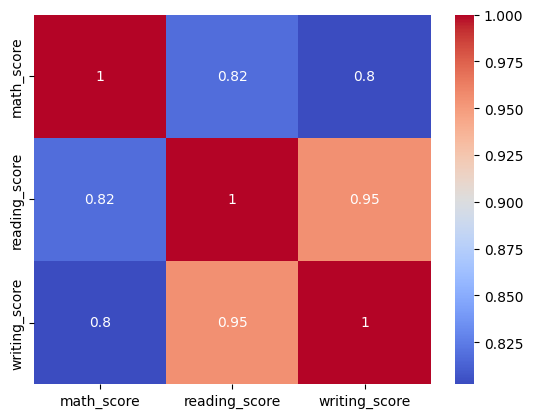

In [17]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



**Grafik Heatmap Korelasi:**
Heatmap ini menunjukkan korelasi antara tiga skor: matematika (`math_score`), membaca (`reading_score`), dan menulis (`writing_score`). Dalam heatmap:
- **Kotak Merah** (`1`): Menunjukkan korelasi sempurna, karena ini adalah korelasi variabel dengan dirinya sendiri.
- **Kotak Biru dan Merah Muda** (`0.82` dan `0.8`): Nilai ini menunjukkan korelasi yang kuat. Di sini, `0.82` adalah korelasi antara skor matematika dan membaca, serta skor membaca dan matematika, yang mengindikasikan bahwa siswa yang mencetak tinggi di satu mata pelajaran cenderung mencetak tinggi di yang lain. Sedangkan `0.8` adalah korelasi antara skor matematika dan menulis, serta menulis dan matematika.
- **Kotak Merah Muda** (`0.95`): Menunjukkan korelasi yang sangat tinggi antara skor membaca dan menulis. Ini mengindikasikan bahwa keterampilan membaca dan menulis sangat berkorelasi, yang berarti peningkatan dalam satu kemungkinan besar akan disertai dengan peningkatan dalam yang lain.

**Warna pada Heatmap:**
Skema warna `coolwarm` yang Anda gunakan mengkodekan korelasi rendah dalam warna biru dan korelasi tinggi dalam warna merah. Nilai korelasi yang lebih dekat ke 1 (merah) menunjukkan hubungan yang sangat kuat, sedangkan yang lebih dekat ke 0.8 (biru ke merah muda) masih menunjukkan hubungan yang kuat tetapi sedikit lebih lemah dibandingkan dengan hubungan antara membaca dan menulis.

Grafik ini sangat berguna untuk mengidentifikasi dan memvisualisasikan hubungan antara berbagai skor yang ada dalam dataset.

```
```

12. **Regresi Linear Sederhana dan Uji Heteroskedastisitas**

    Kode dibawah ini digunakan untuk melakukan analisis regresi linear sederhana antara variabel `reading_score` dan `writing_score`, serta mengevaluasi asumsi homoskedastisitas (varians residual konstan) dalam model regresi menggunakan uji Breusch-Pagan.

    Regresi linear sederhana adalah metode statistik untuk memodelkan hubungan antara satu variabel independen (prediktor) dan satu variabel dependen (respons). Dalam hal ini, `reading_score` sebagai variabel independen digunakan untuk memprediksi `writing_score` sebagai variabel dependen.

    Salah satu asumsi penting dalam regresi linear adalah homoskedastisitas, yaitu varians residual (selisih antara nilai aktual dan nilai prediksi) harus konstan atau homogen untuk semua pengamatan. Jika asumsi ini dilanggar (terjadi heteroskedastisitas), maka estimasi standar error menjadi tidak akurat, yang dapat mempengaruhi signifikansi dan interpretasi koefisien regresi.

    Uji Breusch-Pagan adalah uji statistik yang digunakan untuk mendeteksi adanya heteroskedastisitas dalam model regresi. Jika uji ini mengindikasikan adanya heteroskedastisitas, maka perlu dilakukan penyesuaian dalam model regresi, seperti menggunakan metode estimasi yang robust terhadap heteroskedastisitas atau melakukan transformasi pada variabel-variabel yang terlibat.

    Dengan demikian, kode dibawah ini memungkinkan untuk memodelkan hubungan antara `reading_score` dan `writing_score` menggunakan regresi linear sederhana, sekaligus memverifikasi asumsi homoskedastisitas yang penting untuk validitas dan interpretasi yang akurat dari model regresi.

In [18]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assume data is already loaded into a DataFrame called data
X = data['reading_score']
y = data['writing_score']

# Menambahkan konstanta untuk regresi
X = sm.add_constant(X)

# Membuat model regresi OLS
model = sm.OLS(y, X).fit()

# Menampilkan ringkasan model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:48:08   Log-Likelihood:                -2928.4
No. Observations:                1000   AIC:                             5861.
Df Residuals:                     998   BIC:                             5871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.6676      0.694     -0.962

berikut adalah interpretasi dari hasil regresi linier yang menggunakan metode Ordinary Least Squares (OLS) antara skor membaca (`reading_score`) dan skor menulis (`writing_score`).

**Koefisien Determinasi (R-squared dan Adjusted R-squared)**
- **R-squared (R²)**: Nilai ini adalah 0.911, atau 91.1%, yang menunjukkan bahwa model regresi berhasil menjelaskan 91.1% dari variasi total skor menulis berdasarkan skor membaca. Angka ini menunjukkan bahwa model memiliki tingkat penjelasan yang sangat tinggi, yang berarti bahwa skor membaca adalah prediktor yang sangat baik untuk skor menulis.
- **Adjusted R-squared**: Nilai ini juga 0.911, yang sangat dekat dengan R-squared. Adjusted R-squared disesuaikan untuk jumlah prediktor dalam model (dalam kasus ini hanya satu, yaitu skor membaca). Faktor ini menunjukkan bahwa model tidak hanya cocok dengan baik tetapi juga efisien dalam penggunaan variabel prediktornya.

**F-statistik dan Probabilitasnya**
- **F-statistic**: Nilai F-statistik sebesar 1.025e+04 menunjukkan bahwa model secara keseluruhan memiliki kecocokan statistik yang sangat kuat. F-statistik mengukur seberapa signifikan kontribusi variabel prediktor secara keseluruhan terhadap variasi dalam variabel dependen.
- **Prob (F-statistic)**: Nilai probabilitas yang sangat rendah (hampir 0) menunjukkan bahwa kita dapat sangat percaya diri menolak hipotesis nol yang menyatakan bahwa skor membaca tidak memiliki pengaruh terhadap skor menulis. Ini menunjukkan bahwa model kita memiliki validitas statistik yang kuat.

**Koefisien Regresi**
- **Koefisien untuk `reading_score`**: Nilai 0.9935 menunjukkan bahwa untuk setiap peningkatan satu unit dalam skor membaca, skor menulis diperkirakan meningkat sekitar 0.9935 unit, dengan semua faktor lain tetap konstan. Ini menunjukkan hubungan yang sangat kuat dan positif antara kedua variabel tersebut.
- **P>|t| untuk `reading_score`**: P-value yang sangat kecil menunjukkan bahwa koefisien ini sangat signifikan secara statistik. Ini mengkonfirmasi bahwa hubungan yang kita lihat dalam data bukan kebetulan.
  
**Interval Kepercayaan**
- **[0.025 0.975]**: Interval kepercayaan ini (dari 0.974 hingga 1.013) untuk koefisien `reading_score` memberi kita rentang di mana kita dapat yakin bahwa koefisien "sejati" akan jatuh 95% dari waktu. Rentang ini tidak meliputi nol, yang lebih lanjut menegaskan bahwa ada hubungan yang signifikan antara skor membaca dan menulis.

**Statistik Diagnostik**
- **Durbin-Watson**: Skor 1.970 mendekati 2, yang menunjukkan bahwa ada sedikit atau tidak ada autokorelasi dalam residu model. Ini adalah indikator baik bahwa model telah memenuhi salah satu asumsi penting dalam analisis regresi linier.
- **Kondisi No.**: Nilai 343 menunjukkan bahwa model tidak mengalami masalah multikolinearitas yang parah, yang berarti variabel independen tidak terlalu berkorelasi satu sama lain.

Kesimpulannya, analisis ini memberikan bukti kuat bahwa kemampuan membaca dapat digunakan untuk memprediksi skor menulis siswa dengan sangat akurat dan efektif. Model regresi ini sangat robust dan memberikan estimasi yang handal dan signifikan secara statistik mengenai hubungan antara membaca dan menulis.

```
```

13. **Visualisasi Distribusi Residual dan Uji Normalitas Shapiro-Wilk**

    Kode dibawah ini digunakan untuk memvisualisasikan distribusi residual dari model regresi yang telah dibuat sebelumnya, serta melakukan uji normalitas Shapiro-Wilk untuk mengevaluasi asumsi normalitas residual dan Asumsi normalitas residual penting dalam analisis regresi linear karena dapat mempengaruhi validitas uji signifikansi dan interval kepercayaan untuk koefisien regresi. Jika asumsi ini dilanggar, maka interpretasi dan inferensi dari model regresi mungkin tidak valid.

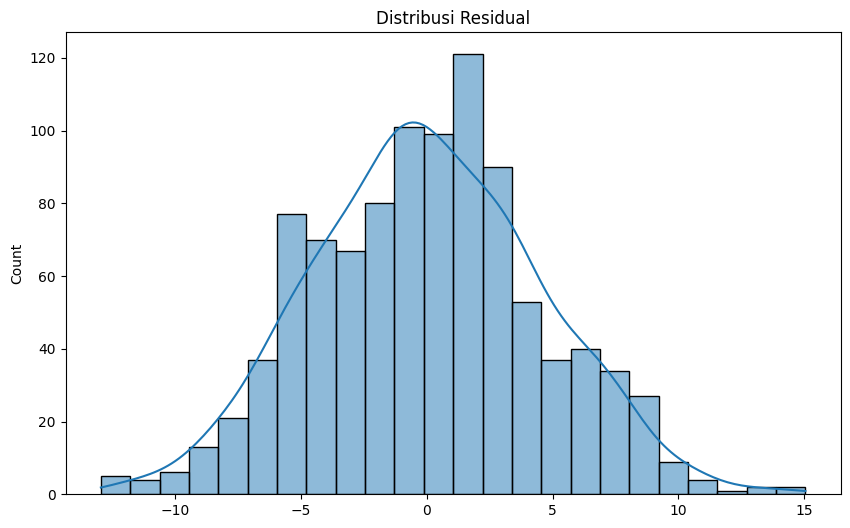

Shapiro-Wilk Test: ShapiroResult(statistic=0.9967344999313354, pvalue=0.03679681941866875)


In [19]:
# Mengatur ukuran figure yang lebih besar
plt.figure(figsize=(10, 6))  # Lebar 10 inci dan tinggi 6 inci

# Histogram distribusi residual dengan kernel density estimate (KDE)
sns.histplot(model.resid, kde=True)
plt.title('Distribusi Residual')
plt.show()

# Uji Normalitas Shapiro-Wilk
shapiro_test = stats.shapiro(model.resid)
print('Shapiro-Wilk Test:', shapiro_test)

Grafik diatas adalah histogram distribusi residu dari model regresi OLS, dengan estimasi kerapatan kernel (KDE) yang di-overlay. Histogram ini digunakan untuk menilai apakah residu dari model tersebar secara normal, yang merupakan asumsi penting dalam regresi linier OLS. berikut penjelasannya:

**Grafik Distribusi Residual**
- **Histogram**: Distribusi residual tampak simetris sekitar nilai 0, dengan kecenderungan yang agak normal. Namun, terdapat beberapa nilai residual yang cukup besar di kanan, menunjukkan kemungkinan outlier atau pengaruh dari nilai-nilai ekstrem dalam data.
- **KDE**: Kurva kerapatan (garis biru) mencoba mengikuti bentuk histogram dan memberikan tampilan visual yang lebih halus tentang distribusi data.

**Uji Normalitas Shapiro-Wilk**
- **Shapiro-Wilk Test**: Anda juga melakukan uji Shapiro-Wilk untuk menguji normalitas dari residu. Hasilnya adalah statistik sebesar 0.9967 dengan p-value 0.0368. Nilai statistik yang mendekati 1 menunjukkan bahwa data cenderung normal, namun p-value kurang dari 0.05 menunjukkan bahwa kita bisa menolak hipotesis nol bahwa data berdistribusi normal pada level signifikansi 5%. Ini bisa menjadi indikasi bahwa ada beberapa penyimpangan dari normalitas, yang mungkin disebabkan oleh outlier atau distribusi data yang tidak sempurna.

**Interpretasi dan Implikasi**
1. **Distribusi Residual**: Meskipun distribusi residual tampak mendekati normal, keberadaan outlier atau nilai ekstrem dapat mempengaruhi kesimpulan tentang normalitas dan efisiensi model. Ini juga bisa mempengaruhi prediksi yang dibuat oleh model.
2. **Uji Shapiro-Wilk**: Meskipun distribusinya tampak mendekati normal, hasil tes Shapiro-Wilk menyarankan bahwa ada bukti statistik yang cukup untuk menolak normalitas pada tingkat kepercayaan 5%. Ini bisa menjadi pertimbangan untuk menyelidiki lebih lanjut apakah model perlu disesuaikan atau diperiksa lebih detail, mungkin dengan mengidentifikasi dan mengelola outlier atau menggunakan model regresi yang lebih robust terhadap pelanggaran asumsi normalitas.


```
```

14. **Uji Normalitas Residual dengan Q-Q Plot dan Uji Shapiro-Wilk**

    Kode dibawah ini digunakan untuk menguji asumsi normalitas residual dalam model regresi menggunakan dua metode: Q-Q plot (Quantile-Quantile plot) dan uji Shapiro-Wilk.
    
    `Q-Q plot (Quantile-Quantile plot)` digunakan untuk menguji asumsi normalitas residual dalam model regresi secara visual. Pada Q-Q plot, jika residual terdistribusi secara normal, maka titik-titik akan berada di sekitar garis referensi (garis lurus). Sebaliknya, jika titik-titik menyimpang jauh dari garis referensi, maka ini mengindikasikan bahwa residual tidak terdistribusi secara normal. Alasan utama menggunakan Q-Q plot adalah karena memberikan visualisasi yang intuitif dan mudah diinterpretasikan untuk mengevaluasi normalitas residual, serta memungkinkan identifikasi jenis penyimpangan dari normalitas seperti skewness, outlier, atau ekor yang lebih tebal. Visualisasi ini sangat bermanfaat dalam analisis regresi linear, karena asumsi normalitas residual merupakan salah satu asumsi penting yang harus dipenuhi.

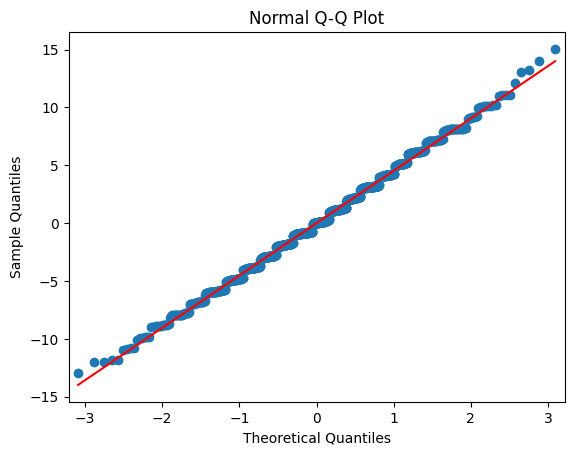

Shapiro-Wilk Test - p-value: 0.03679681941866875


In [20]:
# Q-Q plot untuk menguji normalitas residu
sm.qqplot(model.resid, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

# Uji Shapiro-Wilk untuk normalitas
from scipy.stats import shapiro
stat, p_value = shapiro(model.resid)
print('Shapiro-Wilk Test - p-value:', p_value)


**Analisis Residu dan Normalitas dalam Regresi Linier**

**Pentingnya Normalitas Residu**
Normalitas residu adalah aspek kritis dalam analisis regresi linier karena beberapa alasan:
1. **Efisiensi Estimasi**: Normalitas residu memastikan bahwa estimasi parameter adalah yang paling efisien—berarti memiliki varian yang terkecil—dalam kelas estimator linier tak bias, seperti yang dinyatakan dalam Teorema Gauss-Markov.
2. **Inferensi Statistik**: Keandalan uji hipotesis dan interval kepercayaan dalam regresi linier bergantung pada asumsi bahwa residu berdistribusi normal. Pelanggaran asumsi ini bisa menyebabkan kesimpulan yang salah dari uji statistik.

**Visualisasi dan Uji Statistik**
- **Plot Q-Q**: Plot Q-Q menunjukkan bahwa walaupun sebagian besar residu mengikuti garis yang konsisten dengan distribusi normal teoretis, terdapat beberapa penyimpangan yang signifikan, khususnya di ujung distribusi. Penyimpangan ini menunjukkan adanya outlier atau residu yang tidak mengikuti distribusi normal sempurna.
- **Uji Shapiro-Wilk**: Uji Shapiro-Wilk yang Anda lakukan menghasilkan p-value sebesar 0.0368, menunjukkan bahwa hipotesis nol tentang normalitas residu harus ditolak pada tingkat signifikansi 5%. Ini mengonfirmasi observasi dari plot Q-Q tentang penyimpangan dari normalitas, kemungkinan besar akibat outlier.



```
```

15. **Visualisasi Hubungan Linier antara Skor Membaca dan Skor Menulis dengan Plot Scatter dan Garis Regresi**

    Kode dibawah ini digunakan untuk memvisualisasikan hubungan antara variabel skor membaca (reading_score) dan skor menulis (writing_score) menggunakan plot scatter, serta menggambarkan garis regresi linier yang sesuai dengan data tersebut

    Kita menggunakan kode tersebut untuk melakukan visualisasi dan mengevaluasi asumsi linearitas dalam model regresi linear antara variabel skor membaca (reading_score) dan skor menulis (writing_score).

    Secara singkat, alasan utama menggunakan kode ini adalah:

    1. Membuat plot scatter untuk memvisualisasikan hubungan antara skor membaca dan skor menulis. Plot ini memungkinkan kita untuk melihat secara visual apakah hubungan antara kedua variabel tersebut bersifat linear atau tidak.

    2. Menggambarkan garis regresi linear yang sesuai dengan data pada plot scatter. Jika asumsi linearitas terpenuhi, maka titik-titik pada plot scatter akan berada di sekitar garis regresi linear.

    3. Memungkinkan identifikasi pola non-linear atau outlier yang signifikan dalam data, yang dapat mempengaruhi keakuratan model regresi linear.

    4. Memberikan visualisasi yang intuitif dan mudah diinterpretasikan untuk mengevaluasi kesesuaian asumsi linearitas sebelum melakukan analisis regresi linear lebih lanjut.

    Dengan demikian, kode dibawah ini sangat penting dalam analisis regresi linear karena asumsi linearitas merupakan salah satu asumsi utama yang harus dipenuhi agar model regresi linear valid dan dapat diinterpretasikan dengan baik.

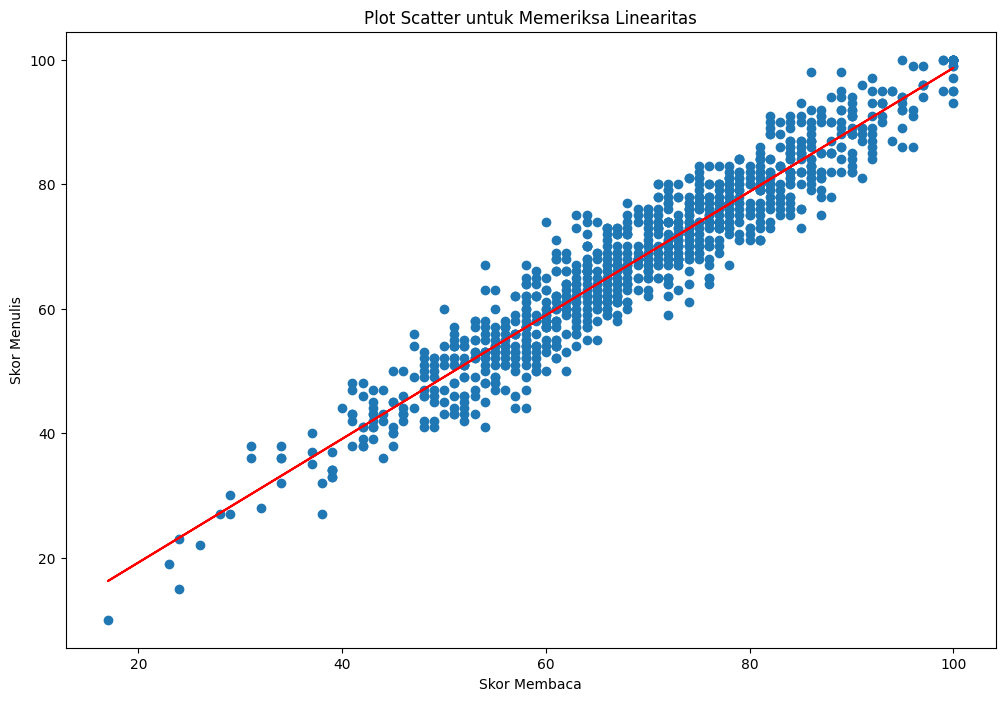

In [21]:


# Data
x = data['reading_score']
y = data['writing_score']

# Menghitung koefisien regresi linier (slope dan intercept)
slope, intercept = np.polyfit(x, y, 1)

# Membuat garis regresi
regression_line = slope * x + intercept

# Mengatur ukuran figure yang lebih besar
plt.figure(figsize=(12, 8))  # Lebar 12 inci dan tinggi 8 inci

# Plot scatter
plt.scatter(x, y)
plt.plot(x, regression_line, color='red')  # Garis regresi

# Label dan judul
plt.xlabel('Skor Membaca')
plt.ylabel('Skor Menulis')
plt.title('Plot Scatter untuk Memeriksa Linearitas')

# Menampilkan plot
plt.show()




**Penjelasan Kode:**
1. **Pengambilan Data**: Variabel `x` merepresentasikan skor membaca, dan `y` merepresentasikan skor menulis.
2. **Kalkulasi Koefisien Regresi**: Anda menggunakan fungsi `np.polyfit` dengan parameter 1 untuk menghitung koefisien linier (slope) dan intercept dari garis regresi. Ini menghasilkan model linier terbaik yang cocok dengan data yang diberikan.
3. **Konstruksi Garis Regresi**: Anda menghitung nilai-nilai pada garis regresi dengan mengalikan slope yang didapat dari `np.polyfit` dengan `x` dan menambahkan intercept.
4. **Pembuatan Plot**: Anda membuat plot scatter menggunakan `plt.scatter` untuk menunjukkan hubungan antara x dan y. Garis regresi, yang ditarik dengan `plt.plot`, ditambahkan untuk menunjukkan bagaimana tren linier cocok dengan data.
5. **Customisasi Plot**: Plot disesuaikan dengan ukuran yang lebih besar, label pada sumbu, dan judul.

**Interpretasi dari Plot:**
- **Hubungan Linear**: Garis regresi yang ditampilkan dalam warna merah menunjukkan hubungan linier yang kuat antara skor membaca dan menulis. Ini sesuai dengan hipotesis awal bahwa siswa yang skor membacanya tinggi cenderung memiliki skor menulis yang tinggi juga.
- **Distribusi Data**: Titik data menyebar secara luas sepanjang garis regresi, menunjukkan variabilitas yang ada dalam hubungan tetapi masih mengikuti tren linear yang kuat.
- **Outlier**: Ada beberapa titik data yang tampaknya menyimpang dari garis regresi, menunjukkan beberapa outlier atau keunikan dalam data yang mungkin memerlukan investigasi lebih lanjut atau dapat dijelaskan oleh faktor lain yang tidak termasuk dalam model ini.


```
```

16. **Menghitung Variance Inflation Factor (VIF) untuk Setiap Variabel Independen dalam Model Regresi Linier**

    Kode dibawah ini digunakan untuk menghitung Variance Inflation Factor (VIF) untuk setiap variabel independen dalam model regresi linier. VIF adalah metrik yang digunakan untuk mendeteksi adanya multikolinearitas, yaitu korelasi yang kuat antara variabel-variabel independen dalam model regresi.

    Multikolinearitas dapat menyebabkan estimasi koefisien regresi menjadi tidak stabil dan menyebabkan masalah dalam menginterpretasi pengaruh setiap variabel independen terhadap variabel dependen. Oleh karena itu, penting untuk mengidentifikasi dan menangani multikolinearitas dalam model regresi.

    Nilai VIF yang tinggi (umumnya di atas 5 atau 10) mengindikasikan adanya multikolinearitas yang tinggi antara variabel independen tersebut dengan variabel independen lainnya. Dalam kasus seperti ini, jadi mungkin perlu mempertimbangkan untuk menghapus variabel independen yang memiliki VIF tinggi dari model atau melakukan teknik lain untuk menangani multikolinearitas, seperti penggabungan variabel atau regresi komponen utama.

    Dengan menghitung VIF, kode dibawah ini membantu mengidentifikasi variabel-variabel independen yang mungkin menyebabkan masalah multikolinearitas dalam model regresi linier, sehingga langkah-langkah yang tepat dapat diambil untuk memastikan validitas dan interpretasi yang akurat dari model.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Menghitung VIF untuk setiap variabel
X = data[['reading_score', 'math_score']]  # contoh dengan beberapa variabel independen
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


         feature        VIF
0          const  24.177583
1  reading_score   3.016014
2     math_score   3.016014




**Penjelasan Hasil:**
Hasil yang diberikan menunjukkan tiga baris:
- **const**: Nilai VIF untuk konstanta (biasanya tinggi dan tidak perlu dikhawatirkan).
- **reading_score**: Nilai VIF untuk skor bacaan, yaitu 3.016014, yang menunjukkan bahwa ada sedikit multikolinearitas dengan 'math_score', tapi masih di bawah ambang batas umum 5 atau 10 yang sering digunakan untuk mengindikasikan masalah serius.
- **math_score**: Sama seperti 'reading_score', dengan nilai VIF yang identik, menunjukkan tingkat multikolinearitas yang sama.

Nilai VIF di atas 1 menunjukkan adanya tingkat multikolinearitas, dan semakin tinggi nilai tersebut, semakin besar masalah multikolinearitasnya. Dalam kasus ini, nilai di bawah 5 menunjukkan bahwa multikolinearitas tidak terlalu mengkhawatirkan untuk dua variabel ini.

```
```

17. **Pengujian Asumsi Homoskedastisitas**

    Salah satu asumsi penting dalam analisis regresi linear adalah homoskedastisitas, yang berarti varians residual (atau galat) harus konstan untuk semua pengamatan. Jika asumsi ini tidak terpenuhi, maka terjadi kondisi heteroskedastisitas, yang dapat menyebabkan estimasi parameter menjadi bias dan tidak efisien.

    Pada kode dibawah ini, terdapat dua metode yang digunakan untuk memeriksa asumsi homoskedastisitas:

    1. Plot Residu (Scatter Plot)
    Pada bagian pertama kode, plot residu dibuat dengan memplot nilai terprediksi (predicted_values) pada sumbu x dan nilai residual (residuals) pada sumbu y. Plot ini dapat memberikan gambaran visual tentang pola sebaran residual. Jika pola sebaran residual terlihat acak dan tidak membentuk pola tertentu, maka asumsi homoskedastisitas terpenuhi. Namun, jika terlihat pola tertentu (misalnya menyempit atau melebar dengan bertambahnya nilai terprediksi), maka ada kemungkinan terjadi heteroskedastisitas.

    2. Uji Breusch-Pagan
    Pada bagian kedua kode, dilakukan uji statistik Breusch-Pagan untuk menguji asumsi homoskedastisitas secara formal. Uji ini menghasilkan statistik LM (Lagrange Multiplier) dan nilai p-value terkait. Jika nilai p-value lebih besar dari tingkat signifikansi yang ditetapkan (biasanya 0,05), maka tidak ada cukup bukti untuk menolak hipotesis nol tentang homoskedastisitas. Sebaliknya, jika nilai p-value lebih kecil dari tingkat signifikansi, maka ada bukti yang cukup kuat untuk menolak asumsi homoskedastisitas.

    Pemeriksaan asumsi homoskedastisitas penting karena jika asumsi ini dilanggar (terjadi heteroskedastisitas), maka dapat menyebabkan estimasi parameter menjadi bias dan tidak efisien, serta memengaruhi validitas inferensi statistik



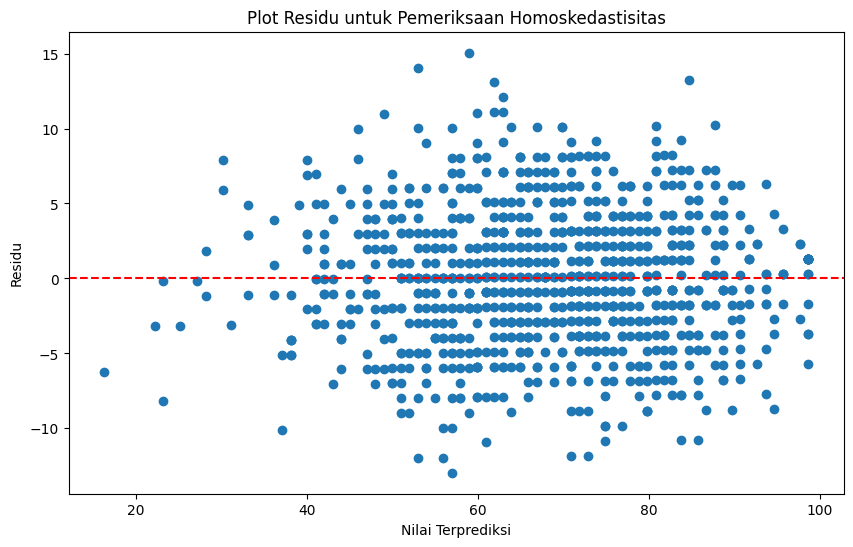

Hasil Uji Breusch-Pagan:
                 value
Statistik LM  2.589574
p-value       0.107569
f-value       2.591105
f p-value     0.107782


In [23]:

# Scatter plot dari nilai terprediksi vs residu
predicted_values = model.predict()
residuals = model.resid
plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar yang lebih besar
plt.scatter(predicted_values, residuals)
plt.xlabel('Nilai Terprediksi')
plt.ylabel('Residu')
plt.title('Plot Residu untuk Pemeriksaan Homoskedastisitas')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Tes Breusch-Pagan
bp_test = sm.stats.het_breuschpagan(residuals, model.model.exog)
bp_results = pd.DataFrame({
    'value': [
        bp_test[0],  # Statistik LM
        bp_test[1],  # p-value LM
        bp_test[2],  # f-value
        bp_test[3]   # f p-value
    ],
}, index=['Statistik LM', 'p-value', 'f-value', 'f p-value'])

# Menampilkan hasil dalam format DataFrame
print("Hasil Uji Breusch-Pagan:")
print(bp_results)



**1. Plot Residu untuk Pemeriksaan Homoskedastisitas**

Kode ini menghasilkan plot residu terhadap nilai-nilai terprediksi. Ini merupakan cara visual untuk menilai apakah residu memiliki varians yang konstan (homoskedastisitas) sepanjang nilai-nilai terprediksi:

- **Scatter Plot**: Plot ini menunjukkan hubungan antara residu (perbedaan antara nilai observasi dan nilai yang diprediksi oleh model regresi) dan nilai terprediksi.
- **Garisan Merah**: Garis horizontal di y = 0 untuk menunjukkan titik di mana residu seharusnya berkumpul jika model cocok dengan baik.

**Interpretasi Grafik:**
- **Homoskedastisitas**: Idealnya, titik-titik pada plot harus tersebar secara acak di sekitar garis merah horizontal tanpa pola yang jelas. Ini menandakan bahwa varians residu konsisten di seluruh nilai terprediksi.
- **Dari Plot**: Dalam grafik yang kamu berikan, tampaknya residu tersebar secara relatif acak, namun mungkin ada sedikit peningkatan dalam variabilitas residu untuk nilai-nilai terprediksi yang lebih tinggi. Ini bisa jadi indikasi heteroskedastisitas.

**2. Tes Breusch-Pagan**

Tes Breusch-Pagan digunakan untuk secara formal menguji apakah varians residu konsisten sepanjang nilai-nilai terprediksi (homoskedastisitas):

- **Statistik LM**: Ini adalah nilai statistik Lagrange Multiplier untuk tes.
- **p-value LM**: p-value untuk statistik LM, menentukan apakah kita menolak hipotesis nol bahwa varians residu adalah konstan.
- **f-value dan f p-value**: Alternatif cara menguji yang sama dengan menggunakan F-statistik.

**Interpretasi Hasil Tes:**
- **Statistik LM**: 2.589574
- **p-value**: 0.107569
- **f-value**: 2.591105
- **f p-value**: 0.107782

Karena p-value lebih besar dari 0.05, kita tidak menolak hipotesis nol pada tingkat signifikansi 5%, yang menunjukkan tidak ada bukti kuat heteroskedastisitas dalam data, meskipun visual plot mungkin menunjukkan sedikit variabilitas. Ini berarti, menurut tes Breusch-Pagan, varians residu relatif konsisten sepanjang nilai terprediksi, yang mendukung asumsi homoskedastisitas dalam model regresi yang digunakan.


```
```

18. **Uji Breusch-Pagan untuk Heteroskedastisitas Untuk Permodelan Regresi Terkahir**

    Uji Breusch-Pagan adalah salah satu uji statistik yang digunakan untuk mendeteksi adanya heteroskedastisitas (varians residual tidak konstan) dalam model regresi linear. Heteroskedastisitas merupakan pelanggaran terhadap asumsi homoskedastisitas, yang menyatakan bahwa varians residual harus konstan untuk semua nilai variabel prediktor.

    Dalam kode dibawah ini, uji Breusch-Pagan digunakan untuk menguji hipotesis nol (H0) yang menyatakan bahwa tidak ada heteroskedastisitas (asumsi homoskedastisitas terpenuhi) melawan hipotesis alternatif (H1) yang menyatakan adanya heteroskedastisitas.

    Mengapa Menggunakan Kode Ini:
    Kode ini digunakan untuk melakukan uji Breusch-Pagan karena beberapa alasan penting:

    1. Mendeteksi Heteroskedastisitas: Uji Breusch-Pagan membantu mendeteksi keberadaan heteroskedastisitas dalam model regresi linear. Jika heteroskedastisitas tidak terdeteksi dan diabaikan, maka dapat mengakibatkan estimasi parameter yang bias dan tidak efisien, serta kesimpulan statistik yang tidak valid.

    2. Uji Formal: Meskipun dapat dilakukan pemeriksaan visual menggunakan plot residu, uji Breusch-Pagan memberikan hasil yang lebih formal dan objektif dengan menggunakan uji statistik. Ini membantu dalam pengambilan keputusan yang lebih akurat dan konsisten.

    3. Interpretasi Hasil: Kode ini tidak hanya melakukan uji Breusch-Pagan, tetapi juga memberikan interpretasi hasil uji dalam bentuk nilai p-value. Nilai p-value digunakan untuk menentukan apakah asumsi homoskedastisitas diterima atau ditolak pada tingkat signifikansi tertentu.

    4. Kesimpulan: Kode ini menyediakan kesimpulan akhir berdasarkan nilai p-value, yang memudahkan pengguna untuk mengambil keputusan tentang apakah asumsi homoskedastisitas terpenuhi atau tidak dalam model regresi linear.



In [24]:
print(model.summary())


# Uji Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_test_result = dict(zip(labels, bp_test))

print(bp_test_result)

# Memanggil p-value
p_value = bp_test_result['p-value']
print(f'p-value dari uji Breusch-Pagan: {p_value}')
print()
print('KESIMPULAN')
if p_value < 0.05:
    print('H0 ditolak, H1 diterima')
else:
    print('H0 diterima, asumsi terpenuhi')

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:48:10   Log-Likelihood:                -2928.4
No. Observations:                1000   AIC:                             5861.
Df Residuals:                     998   BIC:                             5871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.6676      0.694     -0.962


**1. Hasil Regresi OLS**
Output dari regresi OLS memberikan informasi mengenai hubungan antara variabel dependen (`writing_score`) dan variabel independen (`reading_score`).

- **R-squared (R²)**: Nilai 0.911 menunjukkan bahwa model mampu menjelaskan 91.1% variasi dari `writing_score` berdasarkan `reading_score`. Ini merupakan nilai yang sangat tinggi, menunjukkan bahwa model memiliki kecocokan yang baik.
- **Adj. R-squared**: 0.911, hampir sama dengan R², menegaskan penilaian di atas.
- **F-statistic**: 1.025e+04 dengan p-value sangat kecil (dekat dengan 0), menunjukkan bahwa model secara statistik sangat signifikan dan variabel `reading_score` memiliki pengaruh yang kuat dalam memprediksi `writing_score`.
- **Coefficients**:
  - **const**: Koefisien untuk intercept adalah -0.6676 dengan p-value 0.336, menunjukkan bahwa intercept tidak secara statistik signifikan.
  - **reading_score**: Koefisien 0.9935 dengan p-value hampir 0, menunjukkan bahwa untuk setiap peningkatan satu poin dalam `reading_score`, `writing_score` meningkat sekitar 0.9935 poin, dan ini sangat signifikan secara statistik.

- **Durbin-Watson**: Nilai 1.970 mendekati 2, yang menunjukkan tidak ada autokorelasi yang signifikan antara residu.

**2. Uji Breusch-Pagan**
Uji ini digunakan untuk menilai homoskedastisitas, yaitu konstansi dari varians residu sepanjang nilai-nilai terprediksi.

- **p-value dari uji Breusch-Pagan**: 0.10756927079691314. Karena p-value ini lebih besar dari 0.05, kita tidak menolak hipotesis nol bahwa varians residu adalah konstan (homoskedastisitas terpenuhi). Ini menunjukkan tidak ada bukti yang cukup untuk mengatakan bahwa ada heteroskedastisitas dalam model.

**Kesimpulan**
Berdasarkan hasil analisis:
- Model memiliki kecocokan yang sangat baik dengan data, menjelaskan sebagian besar variasi dalam `writing_score` berdasarkan `reading_score`.
- Tidak ada bukti autokorelasi yang signifikan atau masalah heteroskedastisitas, menurut tes Breusch-Pagan dan nilai Durbin-Watson.
- Koefisien untuk `reading_score` sangat signifikan, menunjukkan hubungan yang kuat dan positif dengan `writing_score`.

**Kesimpulan Akhir:**
Model regresi linear sederhana antara `writing_score` dan `reading_score` efektif dan tidak menunjukkan masalah dasar yang sering muncul dalam regresi seperti heteroskedastisitas atau autokorelasi. Ini menunjukkan bahwa model ini dapat diandalkan untuk prediksi atau inferensi lebih lanjut mengenai hubungan antara dua skor tersebut.

## KESIMPULAN

Berdasarkan analisis yang telah dilakukan, data menunjukkan bahwa ada hubungan yang sangat kuat dan positif antara kemampuan membaca dan kemampuan menulis. Dengan kata lain, **semakin pintar seorang anak dalam membaca, semakin mahir pula kemampuan menulisnya**. Ini terlihat dari koefisien signifikan dalam model regresi, yang mengindikasikan bahwa setiap peningkatan dalam skor membaca cenderung diikuti dengan peningkatan yang hampir sama pada skor menulis. Ini menggarisbawahi pentingnya mengembangkan keterampilan membaca sebagai kunci untuk meningkatkan keterampilan menulis di kalangan pelajar.